In [1]:
import pandas as pd
import numpy as np

reviews_df = pd.read_csv("restaurants_reviews_shuffled.csv")

reviews_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,eCUM6_rP0ecI9rsH7NvD3g,HfUKUbZb8MpnHZSDucEHzA,oibnXxBAR9HdvEOH-QK9aA,3,0,0,0,This place was OKAY.......3/5....... the ambie...,2021-02-01 04:03:07
1,VrsHCGoiMCxsuXiIoBL0cQ,C3Hpsx_eDfeSmxEc1HBzpA,vN6v8m4DO45Z4pp8yxxF_w,4,7,3,5,Surrey's is quite the hot spot. We stopped by ...,2017-11-16 23:46:16
2,Sz_RsQqCMN1OH_HCmmSCgg,-fGhtQIddNvy1gEgMBOZMg,cbr2Db20L6P50CsxsX6c2A,3,1,0,1,I thought the food here was OK but the restaur...,2021-01-28 01:19:35
3,FNf3PwJ3y5Y3yxVk3OfEZw,Llw1w7xXcIvV4Naw0eNzKQ,j9Kaj_6tSeXmVMYCgZithg,5,0,0,0,Great date night place! I can't say enough abo...,2018-02-03 04:05:37
4,B4GNzpWpmHqpw3QTRmGO0w,uzS6yltcK79Xla1R63qp5Q,1An4DxtMmvvSe0HX4viRCA,2,2,0,1,"Went 2x's . Our lunch, stuffed shells consiste...",2014-10-26 15:56:45
...,...,...,...,...,...,...,...,...,...
2816914,pS8H9qcXdvSMYGial9c8Qg,SHtvEJtdJWh4clZsvZ57UQ,JT2wYPpO8shGkTYFc5gGLA,1,2,1,0,Food: The bun was way too big for the size of...,2012-08-15 21:04:46
2816915,90YeEVe2kh0r5ThxHhI3bA,NMgIXCkzsqXEe9K7l71prw,kF89t83G376kVxW37m5pnQ,5,0,0,0,"Best pizza in town! Great, friendly staff and...",2013-04-20 21:57:28
2816916,K3J67cfzLYSsXb63DtllQA,VZgEiDiDjbzeIFfuue-v1A,PlaECqs3oPBRo47p85zkzw,5,2,0,1,We loved everything about this place. We order...,2020-12-11 16:38:38
2816917,2xcooTRIHZNnHdhlCwhbRw,4VcGZoH9JkGit2DriDSstQ,MRA2TZW72hvtLPSJTFHW-A,2,1,2,0,This used to be the place to hangout the staff...,2018-10-01 00:48:32


In [6]:
import pandas as pd
from collections import defaultdict
import nltk
# nltk.download('punkt')

def get_word_tokens(text):
    tokens = nltk.word_tokenize(text)
    return tokens

# Count reviews per user and calculate total word count and token count per user
user_stats = defaultdict(dict)

for index, review in reviews_df.iterrows():
    user_id = review['user_id']
    if user_id not in user_stats:
        user_stats[user_id]['reviews_num'] = 0
        user_stats[user_id]['words_num'] = 0
        user_stats[user_id]['tokens_num'] = 0
    
    user_stats[user_id]['reviews_num'] += 1
    user_stats[user_id]['words_num'] += len(review['text'].split())
    user_stats[user_id]['tokens_num'] += len(get_word_tokens(review['text']))

# Count reviews per business and calculate total word count and token count per business
business_stats = defaultdict(dict)

for index, review in reviews_df.iterrows():
    business_id = review['business_id']
    if business_id not in business_stats:
        business_stats[business_id]['reviews_num'] = 0
        business_stats[business_id]['words_num'] = 0
        business_stats[business_id]['tokens_num'] = 0
    
    business_stats[business_id]['reviews_num'] += 1
    business_stats[business_id]['words_num'] += len(review['text'].split())
    business_stats[business_id]['tokens_num'] += len(get_word_tokens(review['text']))

# Convert to DataFrame
user_df = pd.DataFrame.from_dict(user_stats, orient='index').reset_index()
user_df.columns = ['user_id', 'reviews_num', 'words_num', 'tokens_num']

business_df = pd.DataFrame.from_dict(business_stats, orient='index').reset_index()
business_df.columns = ['business_id', 'reviews_num', 'words_num', 'tokens_num']

# Print DataFrames
print("User Statistics:")
print(user_df)

print("\nBusiness Statistics:")
print(business_df)

User Statistics:
                        user_id  reviews_num  words_num  tokens_num
0        HfUKUbZb8MpnHZSDucEHzA            2        120         135
1        C3Hpsx_eDfeSmxEc1HBzpA          262      45241       52670
2        -fGhtQIddNvy1gEgMBOZMg            3        233         256
3        Llw1w7xXcIvV4Naw0eNzKQ           11        624         703
4        uzS6yltcK79Xla1R63qp5Q           36       3611        4211
...                         ...          ...        ...         ...
1016563  vD-sf1iO-lb27a_f8TxcsA            1         56          67
1016564  yNXIm2_CZX5hAKMuI206lA            1         16          18
1016565  6ib1n_8u8-lBYxwXktZGqw            1        125         142
1016566  J0ICiss9xjyApETW0zl76Q            1         96         106
1016567  SHtvEJtdJWh4clZsvZ57UQ            1        397         469

[1016568 rows x 4 columns]

Business Statistics:
                  business_id  reviews_num  words_num  tokens_num
0      oibnXxBAR9HdvEOH-QK9aA          407      514

In [7]:
user_df.to_csv("user_reviews_info.csv", index=False)
business_df.to_csv("business_reviews_info.csv", index=False)

In [42]:
import numpy as np

# Function to remove outliers
def remove_outliers(data):
    mean = data.mean()
    std = data.std()
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std
    return data[(data >= lower_bound) & (data <= upper_bound)]

def calculate_distribution(data):
    
    data = remove_outliers(data)
    
    distribution = {
        'min': np.min(data),
        'max': np.max(data),
        'mean': np.mean(data),
        'std': np.std(data),
        'mode': float(np.argmax(np.bincount(data))),
        'percentiles': {
            '25th': np.percentile(data, 25),
            '50th': np.percentile(data, 50),
            '75th': np.percentile(data, 75),
        }
    }
    return distribution

# User statistics
user_reviews_distribution = calculate_distribution(user_df['reviews_num'])
user_words_distribution = calculate_distribution(user_df['words_num'])
user_tokens_distribution = calculate_distribution(user_df['tokens_num'])

# Business statistics
business_reviews_distribution = calculate_distribution(business_df['reviews_num'])
business_words_distribution = calculate_distribution(business_df['words_num'])
business_tokens_distribution = calculate_distribution(business_df['tokens_num'])

# Print results
print("User Reviews Distribution:")
print(user_reviews_distribution)
print("\nUser Words Distribution:")
print(user_words_distribution)
print("\nUser Tokens Distribution:")
print(user_tokens_distribution)

print("\nBusiness Reviews Distribution:")
print(business_reviews_distribution)
print("\nBusiness Words Distribution:")
print(business_words_distribution)
print("\nBusiness Tokens Distribution:")
print(business_tokens_distribution)

User Reviews Distribution:
{'min': 1, 'max': 18, 'mean': 2.078438885215267, 'std': 2.291421211424048, 'mode': 1.0, 'percentiles': {'25th': 1.0, '50th': 1.0, '75th': 2.0}}

User Words Distribution:
{'min': 1, 'max': 2943, 'mean': 185.24612663066338, 'std': 301.3698878252059, 'mode': 21.0, 'percentiles': {'25th': 44.0, '50th': 88.0, '75th': 190.0}}

User Tokens Distribution:
{'min': 1, 'max': 3396, 'mean': 213.02006043786128, 'std': 347.08208994223406, 'mode': 26.0, 'percentiles': {'25th': 51.0, '50th': 101.0, '75th': 217.0}}

Business Reviews Distribution:
{'min': 5, 'max': 376, 'mean': 49.21812622309198, 'std': 63.81152837715775, 'mode': 5.0, 'percentiles': {'25th': 11.0, '50th': 24.0, '75th': 58.0}}

Business Words Distribution:
{'min': 104, 'max': 37480, 'mean': 4659.5457504343785, 'std': 6251.507558770562, 'mode': 420.0, 'percentiles': {'25th': 964.0, '50th': 2154.0, '75th': 5436.0}}

Business Tokens Distribution:
{'min': 121, 'max': 43242, 'mean': 5358.47278645196, 'std': 7197.3541

In [43]:
def review_percentage(data, num_reviews, compare="equal"):
    
    num_reviews_equals_to_given = (data == num_reviews).sum()
    if compare=="equal":
        selected_num = (data == num_reviews).sum()
    elif compare=="morethan":
        selected_num = (data >= num_reviews).sum()
    elif compare=="lessthan":
        selected_num = (data <= num_reviews).sum() 
    else:
        print("Please select equal, morethan or lessthan !")
        return 0
    total = len(data)
    percentage = (selected_num / total) * 100
    return percentage

# Example usage:
num_reviews = 2
user_review_percent = review_percentage(user_df['reviews_num'], num_reviews, compare="equal")
num_reviews = 24
business_review_percent = review_percentage(business_df['reviews_num'], num_reviews, compare="equal")

print(f"Percentage of users with {num_reviews} reviews: {user_review_percent:.2f}%")
print(f"Percentage of businesses with {num_reviews} reviews: {business_review_percent:.2f}%")

Percentage of users with 24 reviews: 16.10%
Percentage of businesses with 24 reviews: 1.32%


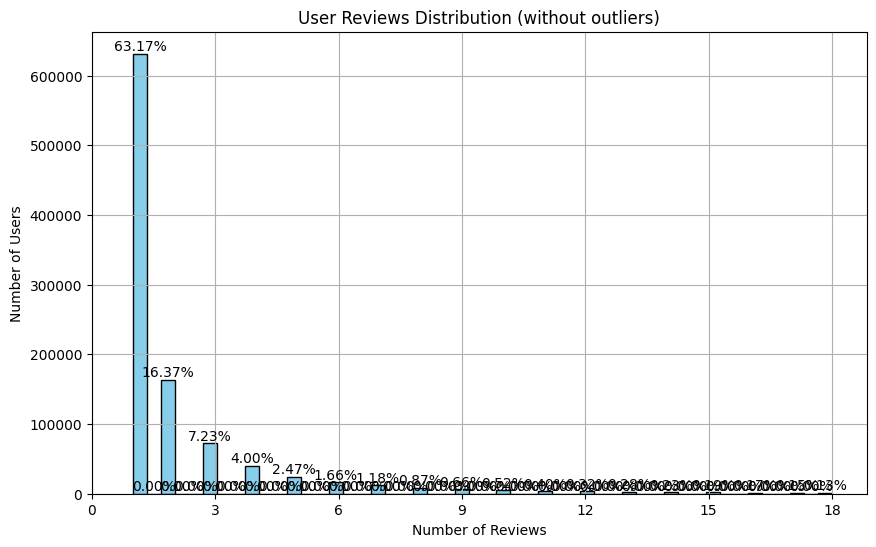

In [46]:
import matplotlib.pyplot as plt

# Function to remove outliers
def remove_outliers(data):
    mean = data.mean()
    std = data.std()
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Remove outliers from user reviews data
user_df['reviews_no_outliers'] = remove_outliers(user_df['reviews_num'])

import matplotlib.pyplot as plt

def plot_distribution(data, title, xlabel, ylabel, bins=50, xticks_step=1):

    # Remove outliers from data
    data_no_outliers = remove_outliers(data)

    # Plot distribution
    plt.figure(figsize=(10, 6))
    hist, bins, _ = plt.hist(data_no_outliers, bins=bins, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    # Calculate percentage of data in each bin
    total_data = len(data_no_outliers)
    bin_percentages = hist / total_data * 100
    
    # Annotate bars with the percentage of data in each bin
    for i in range(len(hist)):
        plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, hist[i], f"{bin_percentages[i]:.2f}%", ha='center', va='bottom')
    
    # Set xticks to integers
    if xticks_step is not None:
        plt.xticks(range(0, int(max(data_no_outliers))+1, xticks_step))
    
    plt.show()

# Example usage:
plot_distribution(user_df['reviews_num'], 'User Reviews Distribution (without outliers)', 'Number of Reviews', 'Number of Users', xticks_step=3)

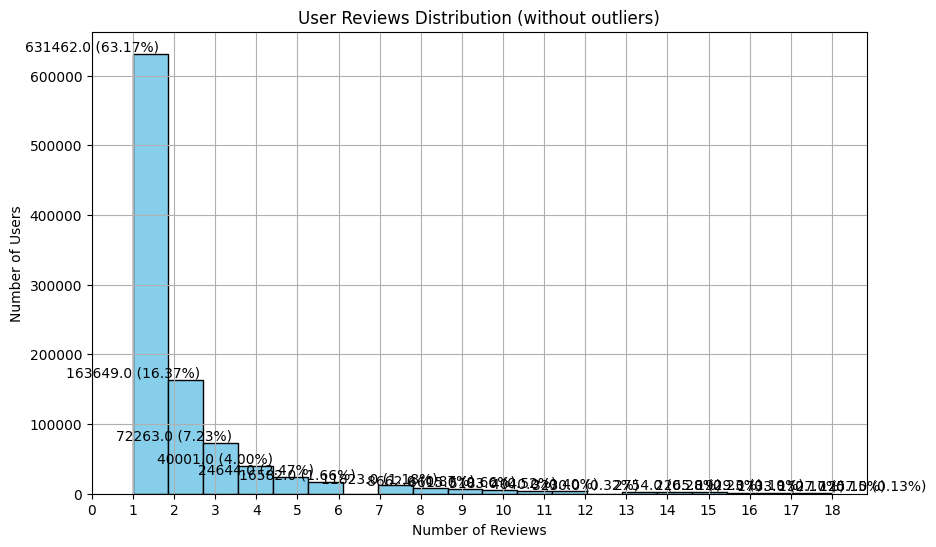

In [50]:
def plot_distribution(data, title, xlabel, ylabel, bins=50, xticks_step=None):

    # Remove outliers from data
    data_no_outliers = remove_outliers(data)

    # Plot distribution
    plt.figure(figsize=(10, 6))
    hist, bins, _ = plt.hist(data_no_outliers, bins=bins, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    # Set xticks to integers
    if xticks_step is not None:
        max_value = max(data_no_outliers)
        if xticks_step == 1:
            xticks = range(0, int(max_value) + 1, 1)
        else:
            xticks = []
            for i in range(int(max_value) - xticks_step + 2):
                xticks.append(''.join([str(i+j) for j in range(xticks_step)]))
        plt.xticks(range(len(xticks)), xticks)
        
        # Annotate bars with the number of reviews and percentage in each bin
        for i in range(len(hist)):
            if hist[i] != 0:  # Only annotate non-zero counts
                plt.text(i, hist[i], f"{hist[i]} ({hist[i] / len(data_no_outliers) * 100:.2f}%)", ha='center', va='bottom')
    
    plt.show()

# Example usage:
plot_distribution(user_df['reviews_num'], 'User Reviews Distribution (without outliers)', 'Number of Reviews', 'Number of Users', bins=20, xticks_step=1)

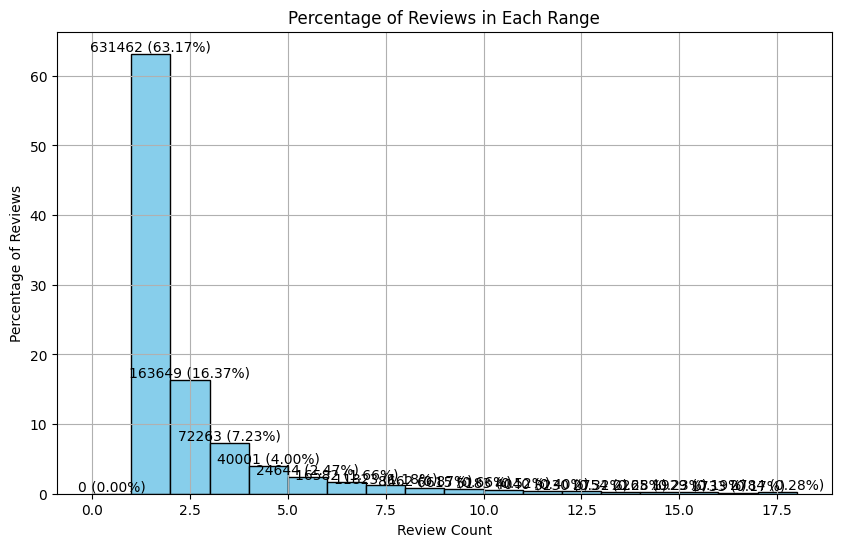

In [37]:
def plot_review_percentage(data, scale):
    # Remove outliers from data
    data_no_outliers = remove_outliers(data)
    
    # Define bins based on scale
    bins = np.arange(0, max(data_no_outliers) + scale, scale)
    
    # Calculate percentage of reviews in each bin
    hist, _ = np.histogram(data_no_outliers, bins=bins)
    total_reviews = len(data_no_outliers)
    bin_percentages = hist / total_reviews * 100
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(bins[:-1], bin_percentages, width=scale, align='edge', color='skyblue', edgecolor='black')
    
    # Annotate bars with the number of reviews and percentage in each range
    for i in range(len(hist)):
        plt.text(bins[i] + scale / 2, bin_percentages[i], f"{hist[i]} ({bin_percentages[i]:.2f}%)", ha='center', va='bottom')
    
    plt.title('Percentage of Reviews in Each Range')
    plt.xlabel('Review Count')
    plt.ylabel('Percentage of Reviews')
    plt.grid(True)
    plt.show()

# Example usage:
plot_review_percentage(user_df['reviews_num'], scale=1)

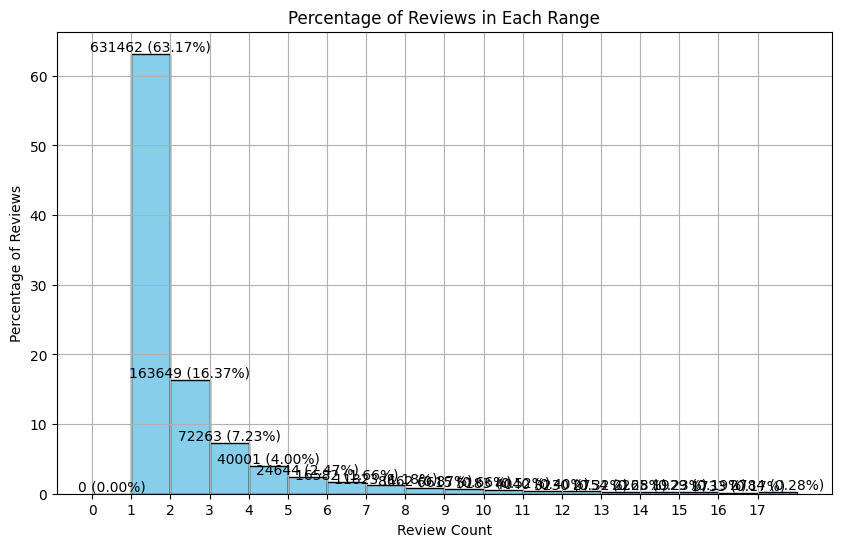

In [51]:
def new_plot_review_percentage(data, scale):
    # Remove outliers from data
    data_no_outliers = remove_outliers(data)
    
    # Define bins based on scale
    bins = np.arange(0, max(data_no_outliers) + scale, scale)
    
    # Calculate percentage of reviews in each bin
    hist, _ = np.histogram(data_no_outliers, bins=bins)
    total_reviews = len(data_no_outliers)
    bin_percentages = hist / total_reviews * 100
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(bins[:-1], bin_percentages, width=scale, align='edge', color='skyblue', edgecolor='black')
    
    # Annotate bars with the percentage in each range
    for i in range(len(hist)):
        plt.text(bins[i] + scale / 2, bin_percentages[i], f"{hist[i]} ({bin_percentages[i]:.2f}%)", ha='center', va='bottom')
    
    # Set xticks to integers and place them below the bars
    plt.xticks(bins[:-1], [int(b) for b in bins[:-1]])
    plt.xlabel('Review Count')
    plt.ylabel('Percentage of Reviews')
    plt.title('Percentage of Reviews in Each Range')
    plt.grid(True)
    plt.show()

# Example usage:
new_plot_review_percentage(user_df['reviews_num'], scale=1)

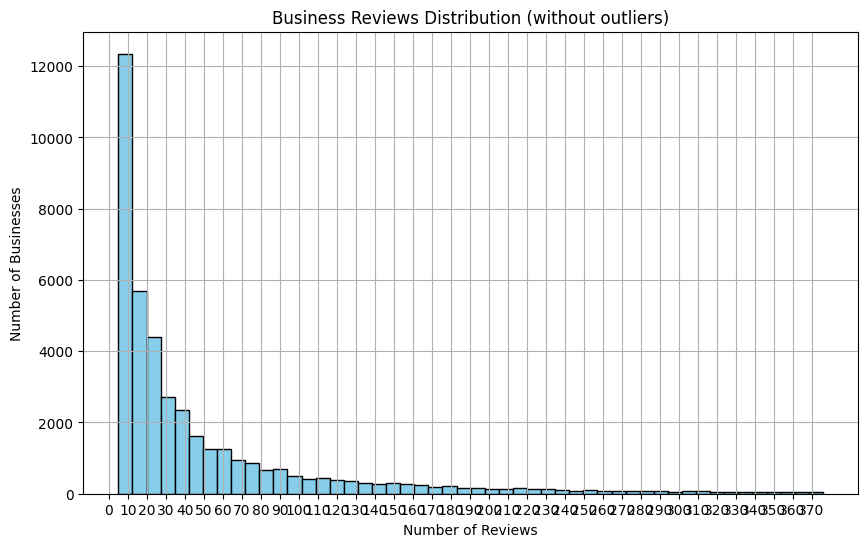

In [38]:
plot_distribution(business_df['reviews_num'], 'Business Reviews Distribution (without outliers)', 'Number of Reviews', 'Number of Businesses', xticks_step=10)

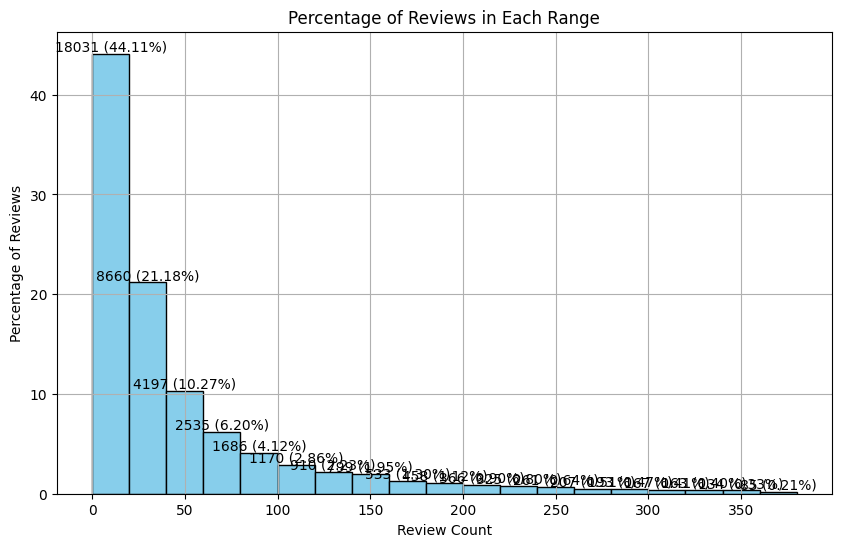

In [88]:
# Example usage:
plot_review_percentage(business_df['reviews_num'], scale=20)

In [61]:
def calculate_review_percentage_by_granularity(data, granularity):
    # Remove outliers from data
    data_no_outliers = remove_outliers(data)
    
    # Calculate number of bins based on granularity
    num_bins = int(np.ceil((max(data_no_outliers)+1) / granularity))
    
    # Define bins
    bins = [granularity * i for i in range(num_bins)]
    bins.append(max(data_no_outliers) + 1)  # Add one more bin for the upper bound
    
    # Calculate number of reviews in each bin
    hist, _ = np.histogram(data_no_outliers, bins=bins)
    total_reviews = len(data_no_outliers)
    bin_percentages = hist / total_reviews * 100
    
    # Display results
    for i in range(len(hist)):
        print(f"Number of reviews {i * granularity} to {(i+1) * granularity - 1}: {hist[i]} reviews ({bin_percentages[i]:.2f}%)")

# Example usage:
calculate_review_percentage_by_granularity(user_df['reviews_num'], granularity=1)

Number of reviews 0 to 0: 0 reviews (0.00%)
Number of reviews 1 to 1: 631462 reviews (63.17%)
Number of reviews 2 to 2: 163649 reviews (16.37%)
Number of reviews 3 to 3: 72263 reviews (7.23%)
Number of reviews 4 to 4: 40001 reviews (4.00%)
Number of reviews 5 to 5: 24644 reviews (2.47%)
Number of reviews 6 to 6: 16582 reviews (1.66%)
Number of reviews 7 to 7: 11823 reviews (1.18%)
Number of reviews 8 to 8: 8662 reviews (0.87%)
Number of reviews 9 to 9: 6615 reviews (0.66%)
Number of reviews 10 to 10: 5183 reviews (0.52%)
Number of reviews 11 to 11: 4040 reviews (0.40%)
Number of reviews 12 to 12: 3230 reviews (0.32%)
Number of reviews 13 to 13: 2754 reviews (0.28%)
Number of reviews 14 to 14: 2265 reviews (0.23%)
Number of reviews 15 to 15: 1929 reviews (0.19%)
Number of reviews 16 to 16: 1733 reviews (0.17%)
Number of reviews 17 to 17: 1527 reviews (0.15%)
Number of reviews 18 to 18: 1257 reviews (0.13%)


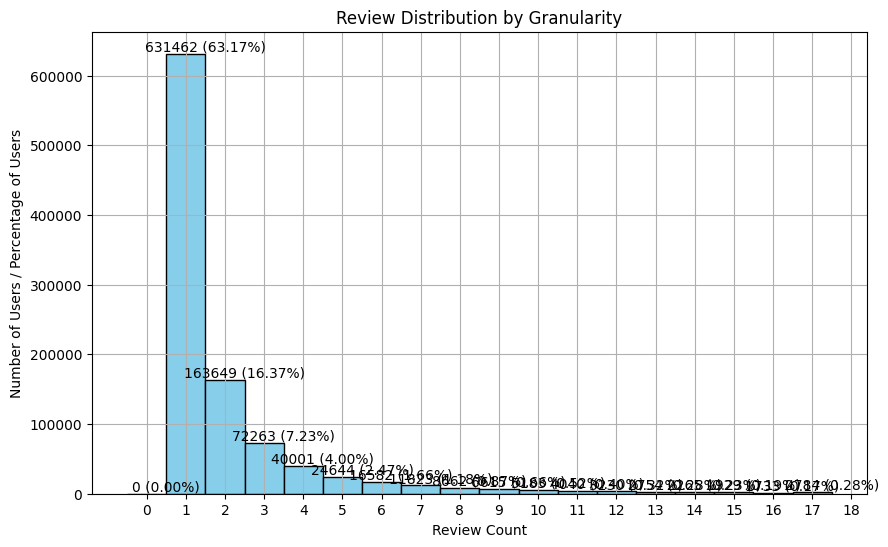

In [83]:
def plot_review_percentage_by_granularity(data, granularity):
    # Remove outliers from data
    data_no_outliers = remove_outliers(data)
    
    # Calculate number of bins based on granularity
    num_bins = int(np.ceil(max(data_no_outliers) / granularity))
    
    # Define bins
    bins = [granularity * i for i in range(num_bins)]
    bins.append(max(data_no_outliers) + 1)  # Add one more bin for the upper bound
    
    # Calculate number of reviews in each bin
    hist, _ = np.histogram(data_no_outliers, bins=bins)
    total_reviews = len(data_no_outliers)
    bin_percentages = hist / total_reviews * 100
    
    # Plot
    plt.figure(figsize=(10, 6))
    if granularity==1:
        plt.bar(bins[:-1], hist, width=granularity, align='center', color='skyblue', edgecolor='black')
    else:
        plt.bar(np.array(bins[:-1]) - 0.5, hist, width=granularity, align='edge', color='skyblue', edgecolor='black')
    
    # Annotate bars with the percentage in each range
    for i in range(len(hist)):
        plt.text(bins[i] + granularity / 2, hist[i], f"{hist[i]} ({bin_percentages[i]:.2f}%)", ha='center', va='bottom')
    
#     # Set xticks to integers and adjust their position based on granularity
    plt.xticks(np.arange(0, max(data_no_outliers) + 1, 1), ha='center')
    # Set xticks to integers and adjust their position based on granularity
#     if granularity == 1:
#         plt.xticks(np.arange(0, max(data_no_outliers) + 1, 1))
#     else:
#         plt.xticks(np.arange(0, max(data_no_outliers) + 1, 1) + 0.5)
    
    plt.xlabel('Review Count')
    plt.ylabel('Number of Users / Percentage of Users')
    plt.title('Review Distribution by Granularity')
    plt.grid(True)
    plt.show()

# Example usage:
plot_review_percentage_by_granularity(user_df['reviews_num'], granularity=1)

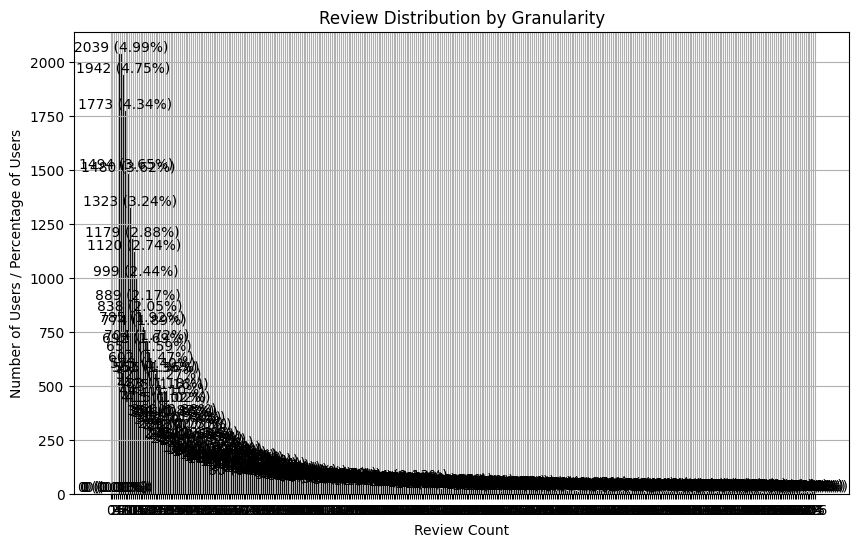

In [87]:
plot_review_percentage_by_granularity(business_df['reviews_num'], granularity=1)